In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_to_load = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_inc = pd.merge(mouse_drug_data_to_load, clinical_trial_data_to_load, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_inc.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumorvolume = pymaceuticals_inc.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
mean_tumorvolume

# Convert to DataFrame
mean_tumorvolume_df = pd.DataFrame(mean_tumorvolume) 

# Preview DataFrame
mean_tumorvolume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
mean_tumorvolume_df.head(12)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror_tumorvolume = pymaceuticals_inc.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
stderror_tumorvolume

# Convert to DataFrame
stderror_tumorvolume_df = pd.DataFrame(stderror_tumorvolume) 

# Preview DataFrame
stderror_tumorvolume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
pymaceuticals_inc_mung = pd.pivot_table(pymaceuticals_inc, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
pymaceuticals_inc_mung = pymaceuticals_inc_mung.loc[ : , 'Tumor Volume (mm3)']
pymaceuticals_inc_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
# Extract means and standard errors for all the drugs
capomulin = pymaceuticals_inc_mung[["Capomulin"]]
capomulin_list = capomulin['Capomulin'].tolist()
capomulin_sem = stderror_tumorvolume[["Capomulin"]]
capomulin_list_sem = capomulin_sem['Capomulin'].tolist()

ceftamin = pymaceuticals_inc_mung[["Ceftamin"]]
ceftamin_list = ceftamin['Ceftamin'].tolist()
ceftamin_sem = stderror_tumorvolume[["Ceftamin"]]
ceftamin_list_sem = ceftamin_sem['Ceftamin'].tolist()

infubinol = pymaceuticals_inc_mung[["Infubinol"]]
infubinol_list = infubinol['Infubinol'].tolist()
infubinol_sem = stderror_tumorvolume[["Infubinol"]]
infubinol_list_sem = infubinol_sem['Infubinol'].tolist()

ketapril = pymaceuticals_inc_mung[["Ketapril"]]
ketapril_list = ketapril['Ketapril'].tolist()
ketapril_sem = stderror_tumorvolume[["Ketapril"]]
ketapril_list_sem = ketapril_sem['Ketapril'].tolist()

naftisol = pymaceuticals_inc_mung[["Naftisol"]]
naftisol_list = naftisol['Naftisol'].tolist()
naftisol_sem = stderror_tumorvolume[["Naftisol"]]
naftisol_list_sem = naftisol_sem['Naftisol'].tolist()

placebo = pymaceuticals_inc_mung[["Placebo"]]
placebo_list = placebo['Placebo'].tolist()
placebo_sem = stderror_tumorvolume[["Placebo"]]
placebo_list_sem = placebo_sem['Placebo'].tolist()

propriva = pymaceuticals_inc_mung[["Propriva"]]
propriva_list = propriva['Propriva'].tolist()
propriva_sem = stderror_tumorvolume[["Propriva"]]
propriva_list_sem = propriva_sem['Propriva'].tolist()

ramicane = pymaceuticals_inc_mung[["Ramicane"]]
ramicane_list = ramicane['Ramicane'].tolist()
ramicane_sem = stderror_tumorvolume[["Ramicane"]]
ramicane_list_sem = ramicane_sem['Ramicane'].tolist()

stelasyn = pymaceuticals_inc_mung[["Stelasyn"]]
stelasyn_list = stelasyn['Stelasyn'].tolist()
stelasyn_sem = stderror_tumorvolume[["Stelasyn"]]
stelasyn_list_sem = stelasyn_sem['Stelasyn'].tolist()

zoniferol = pymaceuticals_inc_mung[["Zoniferol"]]
zoniferol_list = zoniferol['Zoniferol'].tolist()
zoniferol_sem = stderror_tumorvolume[["Zoniferol"]]
zoniferol_list_sem = zoniferol_sem['Zoniferol'].tolist()

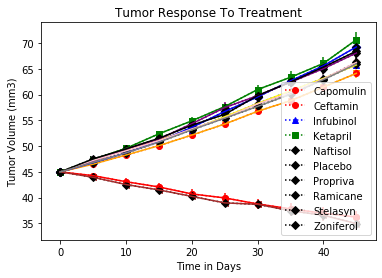

In [7]:
# Setting the Limits
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

# Generate the Plot for each the drugs (with Error Bars)
plt.scatter(x_axis, capomulin_list, marker='o', color='red')
plt.plot(x_axis, capomulin_list, 'r:o', label='Capomulin')
plt.errorbar(x_axis, capomulin_list, yerr=capomulin_list_sem, color='red')

plt.scatter(x_axis, ceftamin_list, marker='v', color='orange')
plt.plot(x_axis, ceftamin_list, 'r:o', label='Ceftamin')
plt.errorbar(x_axis, ceftamin_list, yerr=ceftamin_list_sem, color='orange')

plt.scatter(x_axis, infubinol_list, marker='^', color='yellow')
plt.plot(x_axis, infubinol_list, 'b:^', label='Infubinol')
plt.errorbar(x_axis, infubinol_list, yerr=infubinol_list_sem, color='yellow')

plt.scatter(x_axis, ketapril_list, marker='s', color='green')
plt.plot(x_axis,ketapril_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_list, yerr=ketapril_list_sem, color='green')

plt.scatter(x_axis, naftisol_list, marker='D', color='blue')
plt.plot(x_axis, naftisol_list, 'k:D', label='Naftisol')
plt.errorbar(x_axis, naftisol_list, yerr=naftisol_list_sem, color='blue')

plt.scatter(x_axis, placebo_list, marker='p', color='purple')
plt.plot(x_axis, placebo_list, 'k:D', label='Placebo')
plt.errorbar(x_axis, placebo_list, yerr=placebo_list_sem, color='purple')

plt.scatter(x_axis, propriva_list, marker='X', color='pink')
plt.plot(x_axis, propriva_list, 'k:D', label='Propriva')
plt.errorbar(x_axis, propriva_list, yerr=propriva_list_sem, color='pink')

plt.scatter(x_axis, ramicane_list, marker='<', color='brown')
plt.plot(x_axis, ramicane_list, 'k:D', label='Ramicane')
plt.errorbar(x_axis, ramicane_list, yerr=ramicane_list_sem, color='brown')

plt.scatter(x_axis, stelasyn_list, marker='>', color='black')
plt.plot(x_axis, stelasyn_list, 'k:D', label='Stelasyn')
plt.errorbar(x_axis, stelasyn_list, yerr=stelasyn_list_sem, color='black')

plt.scatter(x_axis, zoniferol_list, marker='*', color='gray')
plt.plot(x_axis, zoniferol_list, 'k:D', label='Zoniferol')
plt.errorbar(x_axis, zoniferol_list, yerr=zoniferol_list_sem, color='gray')

# Title, x label and y label
plt.title("Tumor Response To Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig('Images/Tumor Volume Changes.png')

# Show the Figure
plt.grid()
plt.legend()
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
mean_metastaticsite = pymaceuticals_inc.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
mean_metastaticsite

# Convert to DataFrame
mean_metastaticsite_df = pd.DataFrame(mean_metastaticsite)

# Preview DataFrame
mean_metastaticsite_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [9]:
# Store the Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint 
stderror_metastaticsite = pymaceuticals_inc.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
stderror_metastaticsite

# Convert to DataFrame
stderror_metastaticsite_df = pd.DataFrame(stderror_metastaticsite)

# Preview DataFrame
stderror_metastaticsite_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [10]:
# Minor Data Munging to Re-Format the Data Frames
metastaticsite_mung = pd.pivot_table(pymaceuticals_inc, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
metastaticsite_mung = metastaticsite_mung.loc[ : , 'Metastatic Sites']
metastaticsite_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Extract means and standard errors for all the drugs
capomulin_ms = metastaticsite_mung[["Capomulin"]]
capomulin_ms_list = capomulin_ms['Capomulin'].tolist()
capomulin_ms_sem = stderror_metastaticsite[["Capomulin"]]
capomulin_ms_list_sem = capomulin_ms_sem['Capomulin'].tolist()

ceftamin_ms = metastaticsite_mung[["Ceftamin"]]
ceftamin_ms_list = ceftamin_ms['Ceftamin'].tolist()
ceftamin_ms_sem = stderror_metastaticsite[["Ceftamin"]]
ceftamin_ms_list_sem = ceftamin_ms_sem['Ceftamin'].tolist()

infubinol_ms = metastaticsite_mung[["Infubinol"]]
infubinol_ms_list = infubinol_ms['Infubinol'].tolist()
infubinol_ms_sem = stderror_metastaticsite[["Infubinol"]]
infubinol_ms_list_sem = infubinol_ms_sem['Infubinol'].tolist()

ketapril_ms = metastaticsite_mung[["Ketapril"]]
ketapril_ms_list = ketapril_ms['Ketapril'].tolist()
ketapril_ms_sem = stderror_metastaticsite[["Ketapril"]]
ketapril_ms_list_sem = ketapril_ms_sem['Ketapril'].tolist()

naftisol_ms = metastaticsite_mung[["Naftisol"]]
naftisol_ms_list = naftisol_ms['Naftisol'].tolist()
naftisol_ms_sem = stderror_metastaticsite[["Naftisol"]]
naftisol_ms_list_sem = naftisol_ms_sem['Naftisol'].tolist()

placebo_ms = metastaticsite_mung[["Placebo"]]
placebo_ms_list = placebo_ms['Placebo'].tolist()
placebo_ms_sem = stderror_metastaticsite[["Placebo"]]
placebo_ms_list_sem = placebo_ms_sem['Placebo'].tolist()

propriva_ms = metastaticsite_mung[["Propriva"]]
propriva_ms_list = propriva_ms['Propriva'].tolist()
propriva_ms_sem = stderror_metastaticsite[["Propriva"]]
propriva_ms_list_sem = propriva_ms_sem['Propriva'].tolist()

ramicane_ms = metastaticsite_mung[["Ramicane"]]
ramicane_ms_list = ramicane_ms['Ramicane'].tolist()
ramicane_ms_sem = stderror_tumorvolume[["Ramicane"]]
ramicane_ms_list_sem = ramicane_ms_sem['Ramicane'].tolist()

stelasyn_ms = metastaticsite_mung[["Stelasyn"]]
stelasyn_ms_list = stelasyn_ms['Stelasyn'].tolist()
stelasyn_ms_sem = stderror_metastaticsite[["Stelasyn"]]
stelasyn_ms_list_sem = stelasyn_ms_sem['Stelasyn'].tolist()

zoniferol_ms = metastaticsite_mung[["Zoniferol"]]
zoniferol_ms_list = zoniferol_ms['Zoniferol'].tolist()
zoniferol_ms_sem = stderror_metastaticsite[["Zoniferol"]]
zoniferol_ms_list_sem = zoniferol_ms_sem['Zoniferol'].tolist()

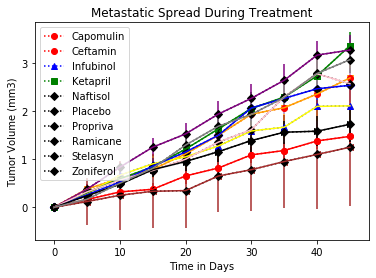

In [13]:
# Setting the Limits
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

# Generate the Plot (with Error Bars)
plt.scatter(x_axis, capomulin_ms_list, marker='o', color='red')
plt.plot(x_axis, capomulin_ms_list, 'r:o', label='Capomulin')
plt.errorbar(x_axis, capomulin_ms_list, yerr=capomulin_ms_list_sem, color='red')

plt.scatter(x_axis, ceftamin_ms_list, marker='v', color='orange')
plt.plot(x_axis, ceftamin_ms_list, 'r:o', label='Ceftamin')
plt.errorbar(x_axis, ceftamin_ms_list, yerr=ceftamin_ms_list_sem, color='orange')

plt.scatter(x_axis, infubinol_ms_list, marker='^', color='yellow')
plt.plot(x_axis, infubinol_ms_list, 'b:^', label='Infubinol')
plt.errorbar(x_axis, infubinol_ms_list, yerr=infubinol_ms_list_sem, color='yellow')

plt.scatter(x_axis, ketapril_ms_list, marker='s', color='green')
plt.plot(x_axis,ketapril_ms_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_ms_list, yerr=ketapril_ms_list_sem, color='green')

plt.scatter(x_axis, naftisol_ms_list, marker='D', color='blue')
plt.plot(x_axis, naftisol_ms_list, 'k:D', label='Naftisol')
plt.errorbar(x_axis, naftisol_ms_list, yerr=naftisol_ms_list_sem, color='blue')

plt.scatter(x_axis, placebo_ms_list, marker='p', color='purple')
plt.plot(x_axis, placebo_ms_list, 'k:D', label='Placebo')
plt.errorbar(x_axis, placebo_ms_list, yerr=placebo_ms_list_sem, color='purple')

plt.scatter(x_axis, propriva_ms_list, marker='X', color='pink')
plt.plot(x_axis, propriva_ms_list, 'k:D', label='Propriva')
plt.errorbar(x_axis, propriva_ms_list, yerr=propriva_ms_list_sem, color='pink')

plt.scatter(x_axis, ramicane_ms_list, marker='<', color='brown')
plt.plot(x_axis, ramicane_ms_list, 'k:D', label='Ramicane')
plt.errorbar(x_axis, ramicane_ms_list, yerr=ramicane_ms_list_sem, color='brown')

plt.scatter(x_axis, stelasyn_ms_list, marker='>', color='black')
plt.plot(x_axis, stelasyn_ms_list, 'k:D', label='Stelasyn')
plt.errorbar(x_axis, stelasyn_ms_list, yerr=stelasyn_ms_list_sem, color='black')

plt.scatter(x_axis, zoniferol_ms_list, marker='*', color='gray')
plt.plot(x_axis, zoniferol_ms_list, 'k:D', label='Zoniferol')
plt.errorbar(x_axis, zoniferol_ms_list, yerr=zoniferol_ms_list_sem, color='gray')

# Title, x label and y label
plt.title("Metastatic Spread During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig('Images/Metastatic Site Volume Changes.png')

# Show the Figure
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Written description of three observable trends based on the data.

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_micegrouped = pymaceuticals_inc.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
count_micegrouped

# Convert to DataFrame
count_micegrouped_df = pd.DataFrame(count_micegrouped)

# Preview DataFrame
count_micegrouped_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                26
          5                25
          10               23
          15               23
          20               21
          25               19
          30               18
          35               16
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [17]:
# Minor Data Munging to Re-Format the Data Frames
count_micegrouped_mung = pd.pivot_table(count_micegrouped_df, index=['Timepoint'], columns=['Drug']) 

# Preview the Data Frame
count_micegrouped_mung = count_micegrouped_mung.loc[ : , 'Mouse ID']
count_micegrouped_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [18]:
# Extract means and standard errors for all the drugs
capomulin_mg = count_micegrouped_mung[["Capomulin"]]
capomulin_mg_list = capomulin_mg['Capomulin'].tolist()
capomulin_mg_sem = stderror_metastaticsite[["Capomulin"]]
capomulin_mg_list_sem = capomulin_mg_sem['Capomulin'].tolist()

ceftamin_mg = count_micegrouped_mung[["Ceftamin"]]
ceftamin_mg_list = ceftamin_mg['Ceftamin'].tolist()
ceftamin_mg_sem = stderror_metastaticsite[["Ceftamin"]]
ceftamin_mg_list_sem = ceftamin_mg_sem['Ceftamin'].tolist()

infubinol_mg = count_micegrouped_mung[["Infubinol"]]
infubinol_mg_list = infubinol_mg['Infubinol'].tolist()
infubinol_mg_sem = stderror_metastaticsite[["Infubinol"]]
infubinol_mg_list_sem = infubinol_mg_sem['Infubinol'].tolist()

ketapril_mg = count_micegrouped_mung[["Ketapril"]]
ketapril_mg_list = ketapril_mg['Ketapril'].tolist()
ketapril_mg_sem = stderror_metastaticsite[["Ketapril"]]
ketapril_mg_list_sem = ketapril_mg_sem['Ketapril'].tolist()

naftisol_mg = count_micegrouped_mung[["Naftisol"]]
naftisol_mg_list = naftisol_mg['Naftisol'].tolist()
naftisol_mg_sem = stderror_metastaticsite[["Naftisol"]]
naftisol_mg_list_sem = naftisol_mg_sem['Naftisol'].tolist()

placebo_mg = count_micegrouped_mung[["Placebo"]]
placebo_mg_list = placebo_mg['Placebo'].tolist()
placebo_mg_sem = stderror_metastaticsite[["Placebo"]]
placebo_mg_list_sem = placebo_mg_sem['Placebo'].tolist()

propriva_mg = count_micegrouped_mung[["Propriva"]]
propriva_mg_list = propriva_mg['Propriva'].tolist()
propriva_mg_sem = stderror_metastaticsite[["Propriva"]]
propriva_mg_list_sem = propriva_mg_sem['Propriva'].tolist()

ramicane_mg = count_micegrouped_mung[["Ramicane"]]
ramicane_mg_list = ramicane_mg['Ramicane'].tolist()
ramicane_mg_sem = stderror_tumorvolume[["Ramicane"]]
ramicane_mg_list_sem = ramicane_mg_sem['Ramicane'].tolist()

stelasyn_mg = count_micegrouped_mung[["Stelasyn"]]
stelasyn_mg_list = stelasyn_mg['Stelasyn'].tolist()
stelasyn_mg_sem = stderror_metastaticsite[["Stelasyn"]]
stelasyn_mg_list_sem = stelasyn_mg_sem['Stelasyn'].tolist()

zoniferol_mg = count_micegrouped_mung[["Zoniferol"]]
zoniferol_mg_list = zoniferol_mg['Zoniferol'].tolist()
zoniferol_mg_sem = stderror_metastaticsite[["Zoniferol"]]
zoniferol_mg_list_sem = zoniferol_mg_sem['Zoniferol'].tolist()

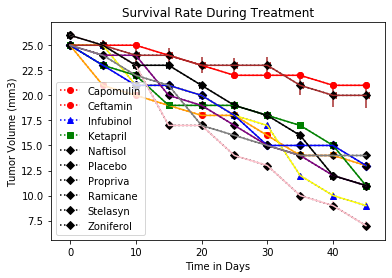

In [20]:
# Setting the Limits
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

# Generate the Plot (Accounting for percentages)
plt.scatter(x_axis, capomulin_mg_list, marker='o', color='red')
plt.plot(x_axis, capomulin_mg_list, 'r:o', label='Capomulin')
plt.errorbar(x_axis, capomulin_mg_list, yerr=capomulin_mg_list_sem, color='red')

plt.scatter(x_axis, ceftamin_mg_list, marker='v', color='orange')
plt.plot(x_axis, ceftamin_mg_list, 'r:o', label='Ceftamin')
plt.errorbar(x_axis, ceftamin_mg_list, yerr=ceftamin_mg_list_sem, color='orange')

plt.scatter(x_axis, infubinol_mg_list, marker='^', color='yellow')
plt.plot(x_axis, infubinol_mg_list, 'b:^', label='Infubinol')
plt.errorbar(x_axis, infubinol_mg_list, yerr=infubinol_mg_list_sem, color='yellow')

plt.scatter(x_axis, ketapril_mg_list, marker='s', color='green')
plt.plot(x_axis,ketapril_mg_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_mg_list, yerr=ketapril_mg_list_sem, color='green')

plt.scatter(x_axis, naftisol_mg_list, marker='D', color='blue')
plt.plot(x_axis, naftisol_mg_list, 'k:D', label='Naftisol')
plt.errorbar(x_axis, naftisol_mg_list, yerr=naftisol_mg_list_sem, color='blue')

plt.scatter(x_axis, placebo_mg_list, marker='p', color='purple')
plt.plot(x_axis, placebo_mg_list, 'k:D', label='Placebo')
plt.errorbar(x_axis, placebo_mg_list, yerr=placebo_mg_list_sem, color='purple')

plt.scatter(x_axis, propriva_mg_list, marker='X', color='pink')
plt.plot(x_axis, propriva_mg_list, 'k:D', label='Propriva')
plt.errorbar(x_axis, propriva_mg_list, yerr=propriva_mg_list_sem, color='pink')

plt.scatter(x_axis, ramicane_mg_list, marker='<', color='brown')
plt.plot(x_axis, ramicane_mg_list, 'k:D', label='Ramicane')
plt.errorbar(x_axis, ramicane_mg_list, yerr=ramicane_mg_list_sem, color='brown')

plt.scatter(x_axis, stelasyn_mg_list, marker='>', color='black')
plt.plot(x_axis, stelasyn_mg_list, 'k:D', label='Stelasyn')
plt.errorbar(x_axis, stelasyn_mg_list, yerr=stelasyn_mg_list_sem, color='black')

plt.scatter(x_axis, zoniferol_mg_list, marker='*', color='gray')
plt.plot(x_axis, zoniferol_mg_list, 'k:D', label='Zoniferol')
plt.errorbar(x_axis, zoniferol_mg_list, yerr=zoniferol_mg_list_sem, color='gray')

# Title, x label and y label
plt.title("Survival Rate During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig('Images/Survival Rate Volume Changes.png')

# Show the Figure
plt.grid()
plt.legend()
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
mean_tumorvolume_df = mean_tumorvolume_df.loc[:, 'Tumor Volume (mm3)']

capomulin_percentchange = ((mean_tumorvolume_df.loc['Capomulin'][45] - mean_tumorvolume_df.loc['Capomulin'][0]) / mean_tumorvolume_df.loc['Capomulin'][0]) * 100
capomulin_percentchange = round(capomulin_percentchange, 2)

ceftamin_percentchange = ((mean_tumorvolume_df.loc['Ceftamin'][45] - mean_tumorvolume_df.loc['Ceftamin'][0]) / mean_tumorvolume_df.loc['Ceftamin'][0]) * 100
ceftamin_percentchange = round(ceftamin_percentchange, 2)

infubinol_percentchange = ((mean_tumorvolume_df.loc['Infubinol'][45] - mean_tumorvolume_df.loc['Infubinol'][0]) / mean_tumorvolume_df.loc['Infubinol'][0]) * 100
infubinol_percentchange = round(infubinol_percentchange, 2)

ketapril_percentchange = ((mean_tumorvolume_df.loc['Ketapril'][45] - mean_tumorvolume_df.loc['Ketapril'][0]) / mean_tumorvolume_df.loc['Ketapril'][0]) * 100
ketapril_percentchange = round(ketapril_percentchange, 2)

naftisol_percentchange = ((mean_tumorvolume_df.loc['Naftisol'][45] - mean_tumorvolume_df.loc['Naftisol'][0]) / mean_tumorvolume_df.loc['Naftisol'][0]) * 100
naftisol_percentchange = round(naftisol_percentchange, 2)

placebo_percentchange = ((mean_tumorvolume_df.loc['Placebo'][45] - mean_tumorvolume_df.loc['Placebo'][0]) / mean_tumorvolume_df.loc['Placebo'][0]) * 100
placebo_percentchange = round(placebo_percentchange, 2)

propriva_percentchange = ((mean_tumorvolume_df.loc['Propriva'][45] - mean_tumorvolume_df.loc['Propriva'][0]) / mean_tumorvolume_df.loc['Propriva'][0]) * 100
propriva_percentchange = round(propriva_percentchange, 2)

ramicane_percentchange = ((mean_tumorvolume_df.loc['Ramicane'][45] - mean_tumorvolume_df.loc['Ramicane'][0]) / mean_tumorvolume_df.loc['Ramicane'][0]) * 100
ramicane_percentchange = round(ramicane_percentchange, 2)

stelasyn_percentchange = ((mean_tumorvolume_df.loc['Stelasyn'][45] - mean_tumorvolume_df.loc['Stelasyn'][0]) / mean_tumorvolume_df.loc['Stelasyn'][0]) * 100
stelasyn_percentchange = round(stelasyn_percentchange, 2)

zoniferol_percentchange = ((mean_tumorvolume_df.loc['Zoniferol'][45] - mean_tumorvolume_df.loc['Zoniferol'][0]) / mean_tumorvolume_df.loc['Zoniferol'][0]) * 100
zoniferol_percentchange = round(zoniferol_percentchange, 2)

# Display the data to confirm
percentchange_list = [capomulin_percentchange, ceftamin_percentchange, 
                    infubinol_percentchange, ketapril_percentchange, 
                    naftisol_percentchange, placebo_percentchange,
                    propriva_percentchange, ramicane_percentchange, 
                    stelasyn_percentchange, zoniferol_percentchange]

drugs = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 
         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

percentchange_df = pd.DataFrame(percentchange_list, columns = ['Percent Change',], index=drugs)
percentchange_df

,Percent Change
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09
Zoniferol,46.58


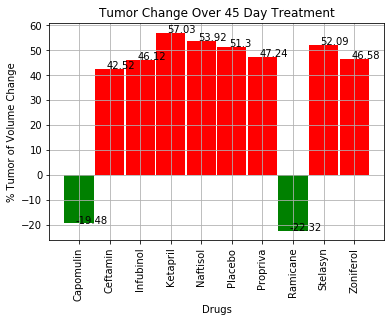

In [25]:
# Store all Relevant Percent Changes into a Tuple
percentchange_tuple = (capomulin_percentchange, ceftamin_percentchange, infubinol_percentchange, ketapril_percentchange, naftisol_percentchange, 
                       placebo_percentchange, propriva_percentchange, ramicane_percentchange, stelasyn_percentchange, zoniferol_percentchange)
percentchange_tuple

# Splice the data between passing and failing drugs
bars = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

# Orient widths. Add labels, tick marks, etc. 
height = percentchange_tuple
y = np.arange(len(bars))
width = 1/1.05
plt.bar(y, height, width, color=['green', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'red'])

# Use functions to label the percentages of changes
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel('Drugs')
plt.xticks(y, bars, rotation=90)
plt.ylabel('% Tumor of Volume Change')

# Call functions to implement the function calls
for a,b in zip(y, height):
    plt.text(a - 0.10, b, str(b))

# Save the Figure
plt.savefig("Images/Tumor Change (45 day treatment).png")

# Show the Figure
plt.show()

### Three Observable Trends
* Both Capomulin and Ramicane seem to be the best performing drugs over the 45 day treatment, since the tumor reduction observed is of 19% and 22%, respectively
* The worst performing drugs over the 45 day treatment with an increase of the tumor are: Ketapril with 57%, Naftisol with 54% and Stelasyn with 52%. 
* Overall it seems that Capomulin is the best drug of choice since it has the least metastatic spread during treatment and the best survival rate during treatment.